# Trained Machine Learning Classifiers In-Action

This notebook predicts sentiment values of extracted sentences with the trained machine learning classifiers.

In [1]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import re
import string
from sklearn import preprocessing
import joblib
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score

In [2]:
mnb = joblib.load('mnb_minorities.sav')
svm = joblib.load('svm_minorities.sav')
rf = joblib.load('rf_minorities.sav')

In [3]:
with open('9thgrade_sentences_lemmatized.txt', 'r', encoding = 'utf-8') as f1:
    lines = f1.readlines()
    test_9 = [line.rstrip() for line in lines]

with open('10thgrade_sentences_lemmatized.txt', 'r', encoding = 'utf-8') as f2:
    lines = f2.readlines()
    test_10 = [line.rstrip() for line in lines]
    
with open('11thgrade_sentences_lemmatized.txt', 'r', encoding = 'utf-8') as f3:
    lines = f3.readlines()
    test_11 = [line.rstrip() for line in lines]

with open('12thgrade_sentences_lemmatized.txt', 'r', encoding = 'utf-8') as f4:
    lines = f4.readlines()
    test_12 = [line.rstrip() for line in lines]

In [4]:
mnb_9_predictions = []
svm_9_predictions = []
rf_9_predictions = []

for line in test_9:
    mnb_9_predictions.append(mnb.predict([line])[0])
    svm_9_predictions.append(svm.predict([line])[0])
    rf_9_predictions.append(rf.predict([line])[0])
    
    
mnb_10_predictions = []
svm_10_predictions = []
rf_10_predictions = []

for line in test_10:
    mnb_10_predictions.append(mnb.predict([line])[0])
    svm_10_predictions.append(svm.predict([line])[0])
    rf_10_predictions.append(rf.predict([line])[0])
    

mnb_11_predictions = []
svm_11_predictions = []
rf_11_predictions = []

for line in test_11:
    mnb_11_predictions.append(mnb.predict([line])[0])
    svm_11_predictions.append(svm.predict([line])[0])
    rf_11_predictions.append(rf.predict([line])[0])
    

mnb_12_predictions = []
svm_12_predictions = []
rf_12_predictions = []

for line in test_11:
    mnb_12_predictions.append(mnb.predict([line])[0])
    svm_12_predictions.append(svm.predict([line])[0])
    rf_12_predictions.append(rf.predict([line])[0])

In [5]:
compiled_results_9 = pd.DataFrame({"Naive Bayes": mnb_9_predictions,
                                   "SVM": svm_9_predictions, 
                                   "Random Forest": rf_9_predictions})

compiled_results_10 = pd.DataFrame({"Naive Bayes": mnb_10_predictions,
                                   "SVM": svm_10_predictions, 
                                   "Random Forest": rf_10_predictions})

compiled_results_11 = pd.DataFrame({"Naive Bayes": mnb_11_predictions,
                                   "SVM": svm_11_predictions, 
                                   "Random Forest": rf_11_predictions})

compiled_results_12 = pd.DataFrame({"Naive Bayes": mnb_12_predictions,
                                   "SVM": svm_12_predictions, 
                                   "Random Forest": rf_12_predictions})

In [41]:
ensembled9 = compiled_results_9.mode(axis=1).astype('int64')
compiled_results_9 = compiled_results_9.assign(Ensemble_decision = ensembled9.iloc[:, 0] )

compiled_results_9['Grade'] = 9

In [42]:
ensembled10 = compiled_results_10.mode(axis=1)
compiled_results_10 = compiled_results_10.assign(Ensemble_decision = ensembled10.iloc[:, 0])

compiled_results_10['Grade'] = 10

In [43]:
ensembled11 = compiled_results_11.mode(axis=1)
compiled_results_11 = compiled_results_11.assign(Ensemble_decision = ensembled11.iloc[:, 0])

compiled_results_11['Grade'] = 11

In [44]:
ensembled12 = compiled_results_12.mode(axis=1)
compiled_results_12 = compiled_results_12.assign(Ensemble_decision = ensembled12.iloc[:, 0])

compiled_results_12['Grade'] = 12

In [57]:
all_ml_compiled = pd.concat([compiled_results_9, compiled_results_10, compiled_results_11, compiled_results_12], 
                            ignore_index = True)

In [58]:
all_ml_compiled['Ensemble_decision'] = all_ml_compiled['Ensemble_decision'].astype('int64')

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

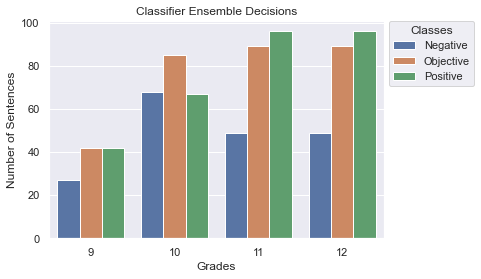

In [70]:
plot = sns.countplot(x="Grade", hue = 'Ensemble_decision', data=all_ml_compiled)
plot.set(xlabel="Grades", ylabel = "Number of Sentences", title='Classifier Ensemble Decisions')
plt.legend(bbox_to_anchor=(1.27, 1), 
           loc='upper right', 
           borderaxespad=0, 
           title = "Classes", 
           labels=['Negative', 'Objective', 'Positive'])
plt.savefig('ensemble_plot.png', dpi=900, bbox_inches='tight')